# Exploring the Building Elevation and Subgrade (BES) Dataset for New York City in Python
Mark Bauer

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from pathlib import Path
import urllib

%matplotlib inline

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



![cover-photo](images/dataset-cover-photo.png)

Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

# Download data dictionary

In [3]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/03455783-2880-43f9-9e53-718ecb353c47\
?download=true&filename=Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'

file_name = 'Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/


# Download dataset guidance PDF

In [4]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/ae1b369c-6ce1-4805-9ad0-aca9f62f3182\
?download=true&filename=Building%20Elevation%20and%20Subgrade%20Dataset%20Guidance.pdf'

file_name = 'Building Elevation and Subgrade Dataset Guidance.pdf'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/


# Exploratory Data Analysis
Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

In [5]:
# read in data from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# preview data
print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (861876, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [6]:
# preview datatypes and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861876 entries, 0 to 861875
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   the_geom    861876 non-null  object 
 1   bin         861876 non-null  int64  
 2   bbl         861876 non-null  int64  
 3   borough     861875 non-null  float64
 4   block       861875 non-null  float64
 5   lot         861876 non-null  int64  
 6   address     844875 non-null  object 
 7   z_grade     861876 non-null  float64
 8   z_floor     861876 non-null  float64
 9   subgrade    861876 non-null  object 
 10  notes1      861876 non-null  object 
 11  notes2      202458 non-null  object 
 12  notes3      472003 non-null  object 
 13  x           861876 non-null  float64
 14  y           861876 non-null  float64
 15  latitude    861876 non-null  float64
 16  longitude   861876 non-null  float64
 17  pluto_bbl   861876 non-null  int64  
 18  Council     861876 non-null  int64  
 19  Bo

In [7]:
# preview null counts
df.isnull().sum()

the_geom           0
bin                0
bbl                0
borough            1
block              1
lot                0
address        17001
z_grade            0
z_floor            0
subgrade           0
notes1             0
notes2        659418
notes3        389873
x                  0
y                  0
latitude           0
longitude          0
pluto_bbl          0
Council            0
BoroCD             0
CTLabel            0
BoroCT2020         0
NTA2020            0
NTAName            0
CDTA2020           0
CDTAName           0
dtype: int64

In [8]:
# summary statistics
cols = [
    'the_geom', 'bin', 'bbl', 'borough', 'block', 'lot', 'address',
    'z_grade', 'z_floor', 'subgrade', 'notes1', 'notes2', 'notes3', 
    'x', 'y', 'latitude', 'longitude',
]

df.loc[:, cols].describe()

,bin,bbl,borough,block,lot,z_grade,z_floor,x,y,latitude,longitude
count,8.618760e+05,8.618760e+05,861875.000000,861875.000000,861876.000000,861876.000000,861876.000000,8.618760e+05,861876.000000,861876.000000,861876.000000
mean,3.610723e+06,3.517133e+09,3.464081,5310.378502,152.170014,53.915012,58.113704,1.006345e+06,191685.085757,40.692719,-73.920238
std,1.053307e+06,1.034376e+09,1.026240,3725.973701,835.862079,42.192895,42.560673,3.288964e+04,30587.626141,0.083946,0.118567
min,1.000003e+06,1.090961e+06,1.000000,1.000000,0.000000,-13.096000,0.000000,9.132653e+05,120977.993002,40.498478,-74.255266
25%,3.089156e+06,3.032080e+09,3.000000,2295.000000,18.000000,23.304000,27.438000,9.893564e+05,168135.316338,40.628135,-73.981596
50%,4.026428e+06,4.010520e+09,4.000000,4860.000000,38.000000,44.328000,48.370000,1.009009e+06,189533.841782,40.686807,-73.910686
75%,4.259005e+06,4.105200e+09,4.000000,7498.000000,64.000000,72.709250,77.063000,1.030179e+06,211378.936954,40.746741,-73.834218
max,5.799523e+06,6.000000e+09,5.000000,99999.000000,9999.000000,402.839000,404.397000,1.067283e+06,272622.861956,40.914923,-73.700369


In [9]:
# summary statistics string columns
df.describe(include=['O'])

,the_geom,address,subgrade,notes1,notes2,notes3,NTA2020,NTAName,CDTA2020,CDTAName
count,861876,844875,861876,861876,202458,472003,861876,861876,861876,861876
unique,861876,796756,2,12,9,2,256,256,71,72
top,POINT (-74.22274561187417 40.52134422844183),FINGERBOARD ROAD,Y,Property was Successfully Measured,"Commercial, Industrial or other Non-Residentia...",Visible Door or Window in subgrade space,SI0302,Great Kills-Eltingville,SI03,SI03 South Shore (CD 3 Approximation)
freq,1,423,472003,646782,112354,310268,16194,16194,48095,48095


In [10]:
# building identification number is unique?
df['bin'].is_unique

True

# Examining the building elevation fields

![images](images/building-elevation-fields.png)

Screenshot from data dictionary

![images](images/notes1-descriptions.png)

Screenshot from data dictionary

In [11]:
# preview building elevation measurements notes
df['notes1'].value_counts()

Property was Successfully Measured                                                                                                      646782
Property not Visible Due to Construction or Obstruction                                                                                 115281
Property was Successfully Measured; No Address Plate or Identification on Building                                                       61567
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  17132
Property not Visible from Street; No Address Plate or Identification on Building                                                         12080
Property was Successfully Measured; Property Under Construction                                                                           2946
Vacant Lot; No Address Plate or Identification on Building                                                                                1957

In [12]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,861876.000000,861876.000000
mean,53.915012,58.113704
std,42.192895,42.560673
min,-13.096000,0.000000
25%,23.304000,27.438000
50%,44.328000,48.370000
75%,72.709250,77.063000
max,402.839000,404.397000


# Previewing building elevation measurements of zero
Insight from data dictionary.

In [13]:
print('z_grade = 0')
print('counts:', df.loc[df['z_grade'] == 0].shape[0])
print()

print('z_floor = 0')
print('counts:', df.loc[df['z_floor'] == 0].shape[0])

z_grade = 0
counts: 14039

z_floor = 0
counts: 14038


Interesting that there is one building that doesn't reconcile. Let's examine.

In [14]:
(df
 .loc[df['z_grade'] == 0, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,14039.0,14039.000000
mean,0.0,0.003058
std,0.0,0.362312
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,42.929000


Review notes.

In [15]:
(df
 .loc[df['z_grade'] == 0, ['notes1']]
 .value_counts()
)

notes1                                                                                                       
Property not Visible from Street; No Address Plate or Identification on Building                                 12079
Vacant Lot; No Address Plate or Identification on Building                                                        1957
Property not Visible Due to Construction or Obstruction                                                              1
Property not Visible from Street; No Address Plate or Identification on Building; Property Under Construction        1
Property was Successfully Measured                                                                                   1
dtype: int64

In [16]:
(df
 .loc[df['z_floor'] == 0, ['notes1']]
 .value_counts()
)

notes1                                                                                                       
Property not Visible from Street; No Address Plate or Identification on Building                                 12079
Vacant Lot; No Address Plate or Identification on Building                                                        1957
Property not Visible Due to Construction or Obstruction                                                              1
Property not Visible from Street; No Address Plate or Identification on Building; Property Under Construction        1
dtype: int64

In [17]:
df.loc[
    (df['z_grade'] == 0)
    & (df['z_floor'] != 0)
]

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
293509,POINT (-73.93461320916565 40.65265373387812),3109155,3048820020,3.0,4882.0,20,372 EAST 46 STREET,0.0,42.929,Y,...,-73.934613,3048820020,41,317,872.0,3087200,BK1703,East Flatbush-Rugby,BK17,BK17 East Flatbush (CD 17 Approximation)


I guess I'll drop this record for now, as it has two conflicting data points. Perhaps it could have a `z_floor `elevation and still have `z_grade` of zero, but I will drop for now. There are also some buildings below grade. We can keep them for now, but it might be worth examining in the future.

In [18]:
# count of buildings below grade
df.loc[df['z_grade'] < 0].shape[0]

11

In [19]:
df = (
    df
    .loc[df['z_grade'] != 0]
    .reset_index(drop=True)
)

print('new shape of data:', df.shape)
df.head()

new shape of data: (847837, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [20]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,847837.000000,847837.000000
mean,54.807770,59.075935
std,41.961752,42.244068
min,-13.096000,0.703000
25%,24.228000,28.361000
50%,45.095000,49.224000
75%,73.343000,77.705000
max,402.839000,404.397000


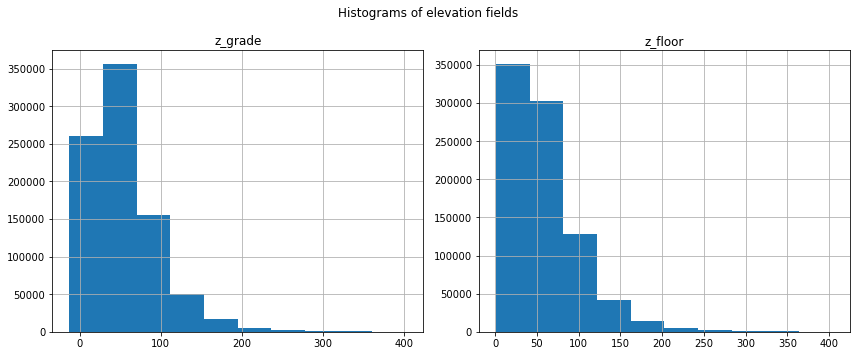

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of elevation fields')
plt.tight_layout()

# Examine z_grade > z_floor

In [22]:
df.loc[df['z_grade'] > df['z_floor']].shape

(316, 26)

In [23]:
(df
 .loc[df['z_grade'] > df['z_floor'], ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,316.000000,316.000000
mean,63.805082,63.000617
std,37.790595,37.731248
min,6.513000,6.211000
25%,35.894000,35.107250
50%,55.554500,54.859500
75%,84.853250,84.248750
max,260.812000,260.770000


In [24]:
(df
 .loc[df['z_grade'] > df['z_floor'], ['notes1']]
 .value_counts()
)

notes1                                                                                                                              
Property was Successfully Measured                                                                                                      246
Property was Successfully Measured; No Address Plate or Identification on Building                                                       34
Property not Visible Due to Construction or Obstruction                                                                                  13
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  10
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building; Property Under Construction      5
Property not Visible Due to Construction or Obstruction; Property Under Construction                                                      3
Property was Successfully M

I need to examine the data dictionary further as to why `z_grade` would be higher than `z_floor`. Dropping for now.

In [25]:
df = (
    df
    .loc[df['z_grade'] <= df['z_floor']]
    .reset_index(drop=True)
)

print('new shape of data:', df.shape)
df.head()

new shape of data: (847521, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


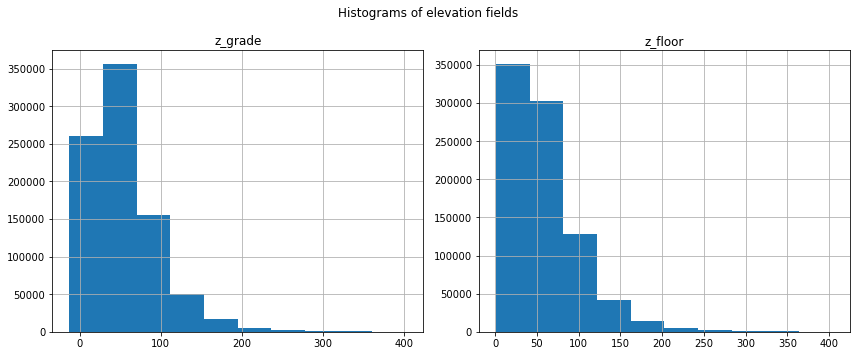

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of elevation fields')
plt.tight_layout()

# Calculating height from building grade to floor

In [27]:
# height from building floor to grade
df['z_floor_grade'] = df['z_floor'] - df['z_grade']

df['z_floor_grade'].describe()

count    847521.000000
mean          4.270057
std           3.085785
min           0.000000
25%           2.019000
50%           3.628000
75%           6.574000
max          94.440000
Name: z_floor_grade, dtype: float64

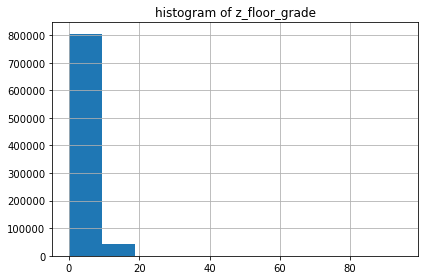

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

df['z_floor_grade'].hist(ax=ax)

plt.title('histogram of z_floor_grade')
plt.tight_layout()

In [29]:
df.sort_values(by='z_floor_grade', ascending=False).head()

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName,z_floor_grade
346658,POINT (-73.93574209682842 40.69593398364827),3042945,3015890032,3.0,1589.0,32,376 VERNON AVENUE,73.010,167.450,N,...,3015890032,36,303,287.0,3028700,BK0302,Bedford-Stuyvesant (East),BK03,BK03 Bedford-Stuyvesant (CD 3 Approximation),94.440
350568,POINT (-73.9164740122271 40.673868341503415),3388026,3014530007,3.0,1453.0,7,347 SARATOGA AVENUE,11.519,100.161,N,...,3014530007,41,316,303.0,3030300,BK1601,Ocean Hill,BK16,BK16 Ocean Hill-Brownsville (CD 16 Approximation),88.642
645690,POINT (-73.93178728594395 40.85598475936347),1064098,1021700370,1.0,2170.0,370,45 WADSWORTH TERRACE,110.057,193.816,Y,...,1021700370,10,112,279.0,1027900,MN1202,Washington Heights (North),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),83.759
658857,POINT (-73.942791536969 40.845811583256236),1063433,1021390293,1.0,2139.0,293,138 HAVEN AVENUE,110.309,192.820,Y,...,1021390293,10,112,255.0,1025500,MN1201,Washington Heights (South),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),82.511
654007,POINT (-73.94335667521972 40.84297641132326),1063401,1021390030,1.0,2139.0,30,50 HAVEN AVENUE,79.612,160.651,Y,...,1021390030,10,112,255.0,1025500,MN1201,Washington Heights (South),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),81.039


Some of these values might be a little high, but more analysis is required to confirm.

Please note: this was a very quick analysis.